<a href="https://colab.research.google.com/github/paulezugaza/ProyectoProg/blob/master/Copia_de_Copia_de_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM


We will upload the dataset from the local system

In [4]:

# Load the data
cyclists_df = pd.read_csv('cyclists.csv')
races_df = pd.read_csv('races.csv')



In [5]:
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [6]:
races_df.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


#TASK 1: DATA UNDERSTANDING


#1.1 Assesing data quality


We will display basic information to understand data structure and check for  any existing null values

In [7]:

print("Cyclists Data:")
print(cyclists_df.info())
print(cyclists_df.describe())
print("\n")

print("Races Data:")
print(races_df.info())
print(races_df.describe())
print("\n")

Cyclists Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB
None
        birth_year       weight       height
count  6121.000000  3078.000000  3143.000000
mean   1974.071884    68.658739   179.815145
std      15.535834     6.348183     6.443447
min    1933.000000    48.000000   154.000000
25%    1962.000000    64.000000   175.000000
50%    1974.000000    69.000000   180.000000
75%    1987.000000    73.000000   184.000000
max    2004.000000    94.000000   204.000000


Races Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries,

The initial data quality assessment of the Cyclists and Races datasets highlights key issues that need to be addressed for accurate analysis.

For the Cyclists dataset, missing values are evident, particularly in the weight and height columns, which are only partially filled (around 50%). These gaps could affect performance-related analysis and clustering, requiring imputation or other solutions. The birth_year column has 13 missing values (0.2%), which can be handled with imputation. Inconsistencies include a wide range of birth years (1933-2004), which may need verification for outliers, and reasonable weight and height values, though outlier checks should be performed. The _url column minimizes duplicate risk, but a final check would be beneficial.

For the Races dataset, missing values in columns like uci_points, climb_total, and cyclist_team may hinder analysis. These gaps require imputation or exclusion of problematic features. The points and length columns fall within expected ranges, but extreme values should be checked. The profile column seems consistent, but verification is advised. The position column shows values from 0 to 205, with 0 potentially indicating missing data or entry errors. Lastly, the delta column has a maximum value of 18,006 seconds, which warrants further review for accuracy.

In conclusion, addressing missing values and inconsistencies in key features like weight, height, uci_points, and profile will be crucial to ensure reliable analysis and clustering.


Now we will visualize it, to have a clearer idea


Missing Values in Cyclists Dataset:
_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

Missing Values in Races Dataset:
_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


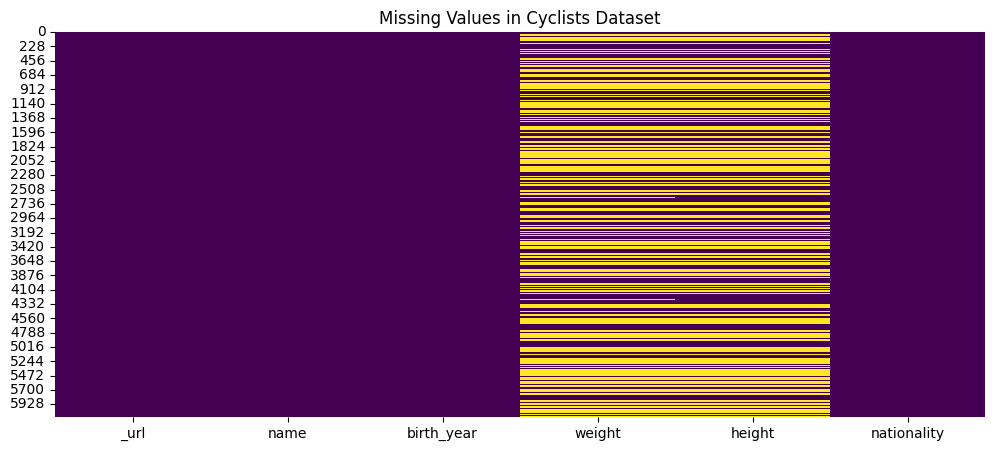

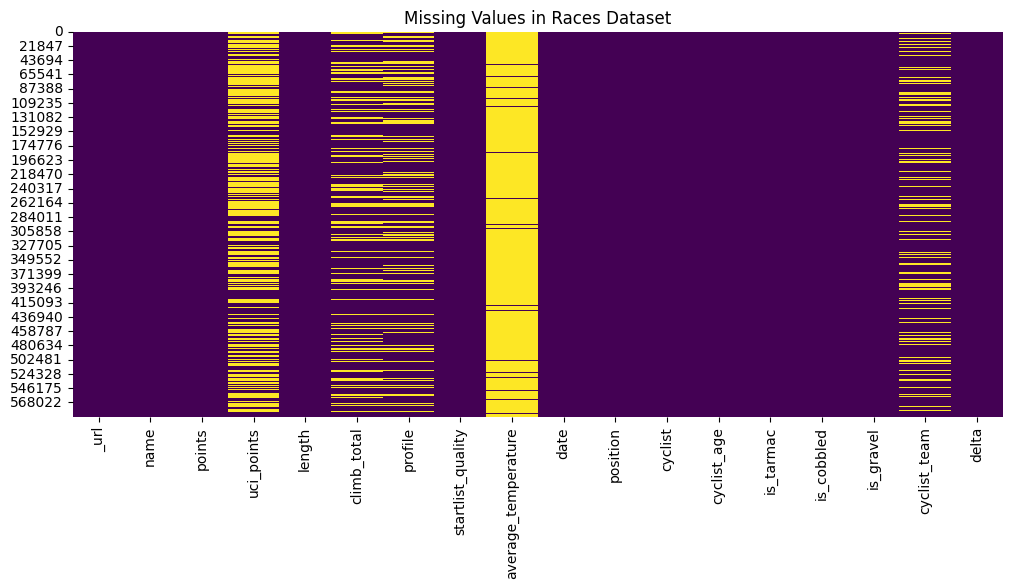

In [8]:

# Check for missing values in both datasets
print("Missing Values in Cyclists Dataset:")
print(cyclists_df.isnull().sum())

print("\nMissing Values in Races Dataset:")
print(races_df.isnull().sum())

# Visualize missing data as a heatmap to see any patterns
plt.figure(figsize=(12, 5))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Cyclists Dataset")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(races_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Races Dataset")
plt.show()

#1.2 Data distribution



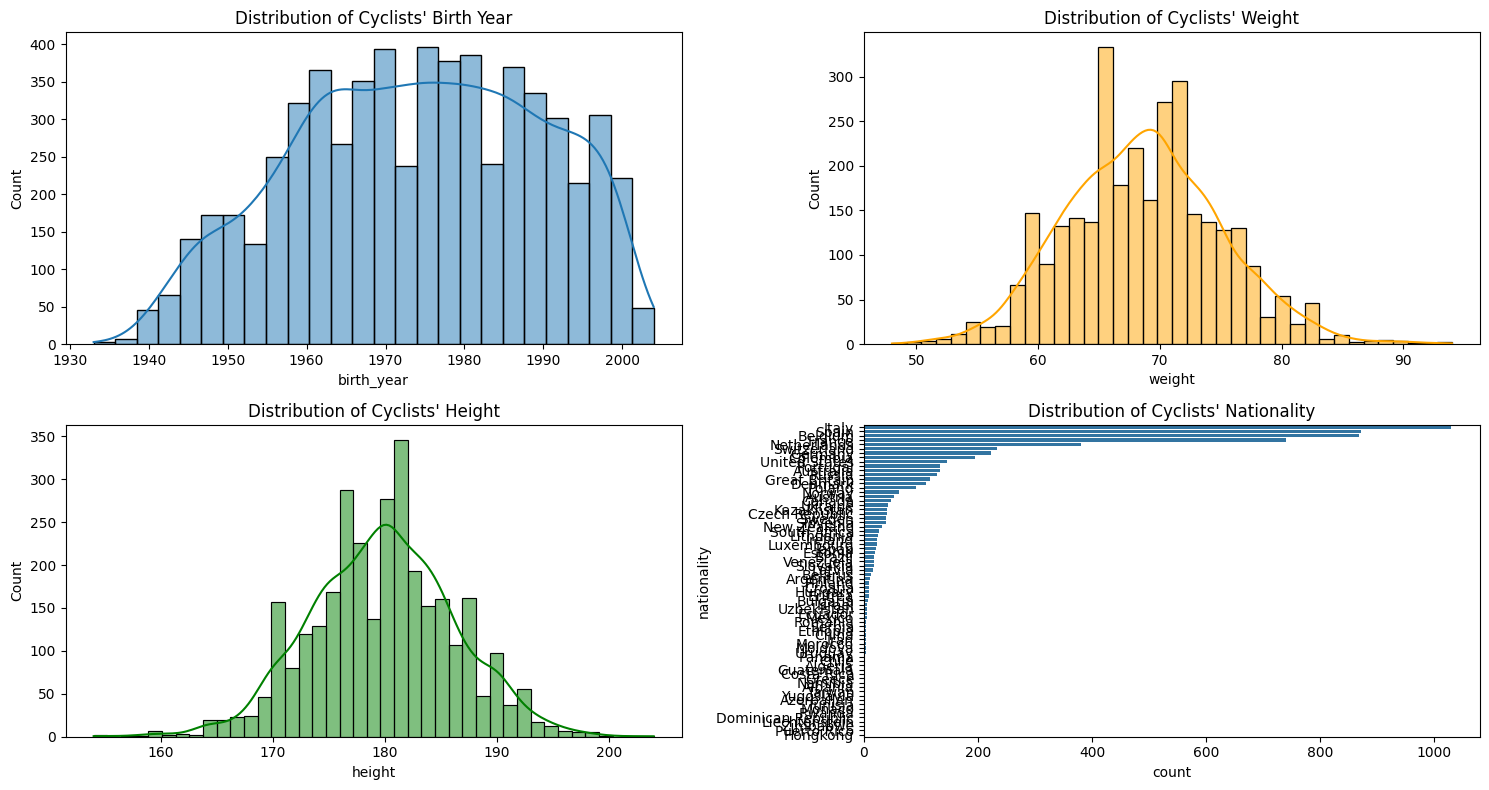

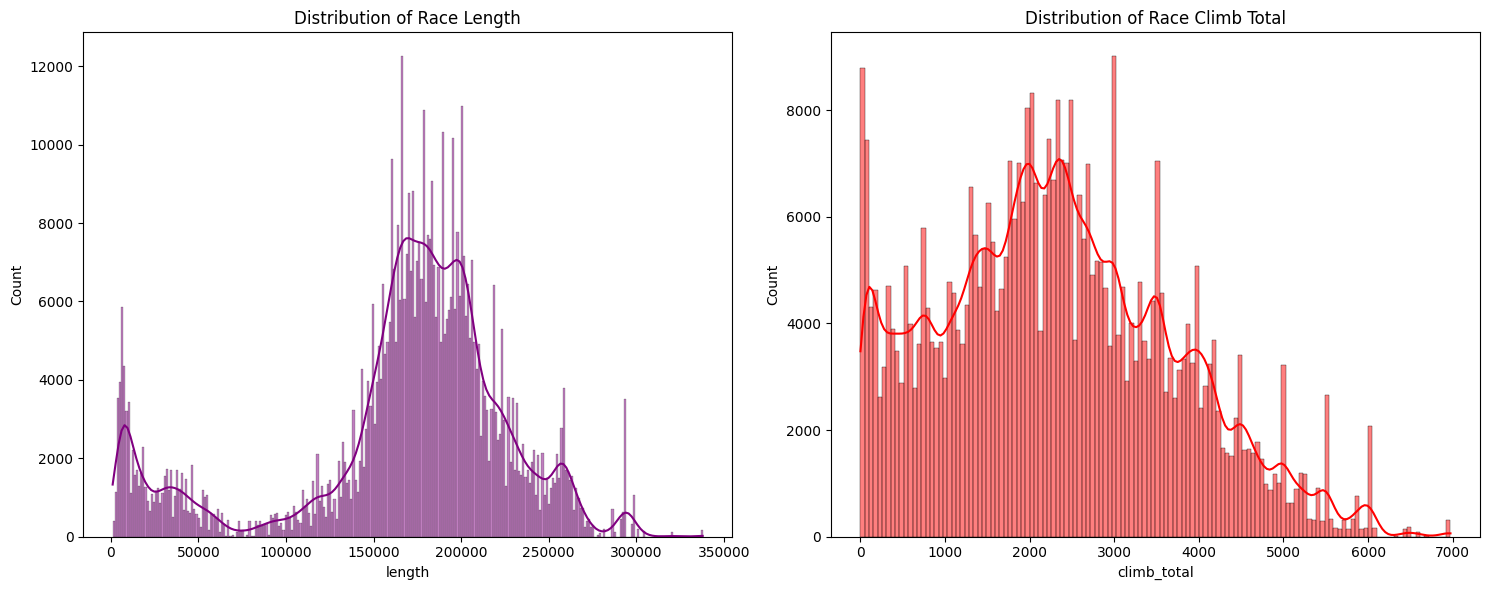

In [9]:


# Plot distribution for key features in cyclists dataset
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(cyclists_df['birth_year'].dropna(), kde=True)
plt.title("Distribution of Cyclists' Birth Year")

plt.subplot(2, 2, 2)
sns.histplot(cyclists_df['weight'].dropna(), kde=True, color='orange')
plt.title("Distribution of Cyclists' Weight")

plt.subplot(2, 2, 3)
sns.histplot(cyclists_df['height'].dropna(), kde=True, color='green')
plt.title("Distribution of Cyclists' Height")


# Display nationality distribution in a count plot
plt.subplot(2, 2, 4)
sns.countplot(data=cyclists_df, y='nationality', order=cyclists_df['nationality'].value_counts().index)
plt.title("Distribution of Cyclists' Nationality")
plt.tight_layout()
plt.show()


# Plot distribution for key features in races dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(races_df['length'].dropna(), kde=True, color='purple')
plt.title("Distribution of Race Length")

plt.subplot(1, 2, 2)
sns.histplot(races_df['climb_total'].dropna(), kde=True, color='red')
plt.title("Distribution of Race Climb Total")
plt.tight_layout()
plt.show()


This code generates visualizations to explore key features in the Cyclists and Races datasets. For the Cyclists dataset, the plots show the distributions of birth_year, weight, and height, which help us understand the age range and physical characteristics of the cyclists. Additionally, a count plot of nationality reveals the distribution of cyclists by country. In the Races dataset, the visualizations display the distribution of race length and the total climb_total, which gives insight into the distances and difficulty levels of the races. These plots are useful for identifying patterns, trends, and potential outliers, guiding the next steps in data cleaning and analysis.


# 1.3 Relationships between features


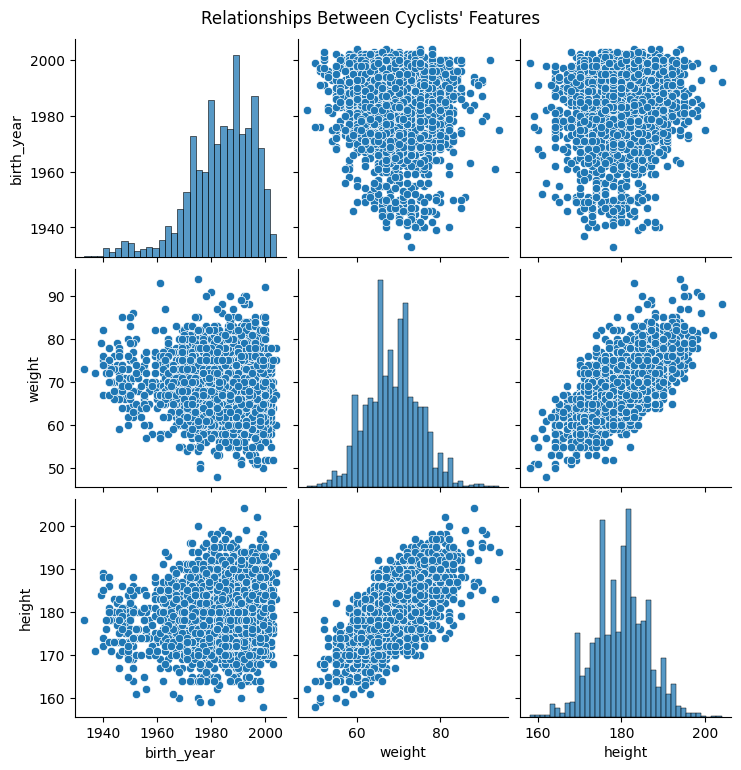

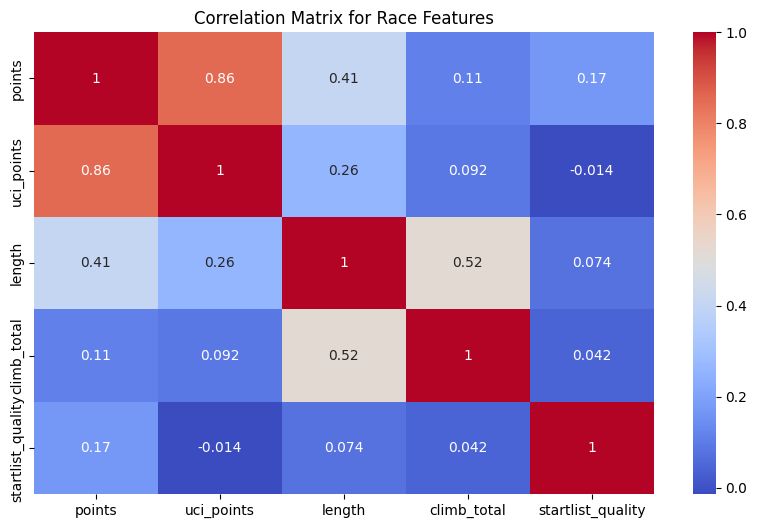

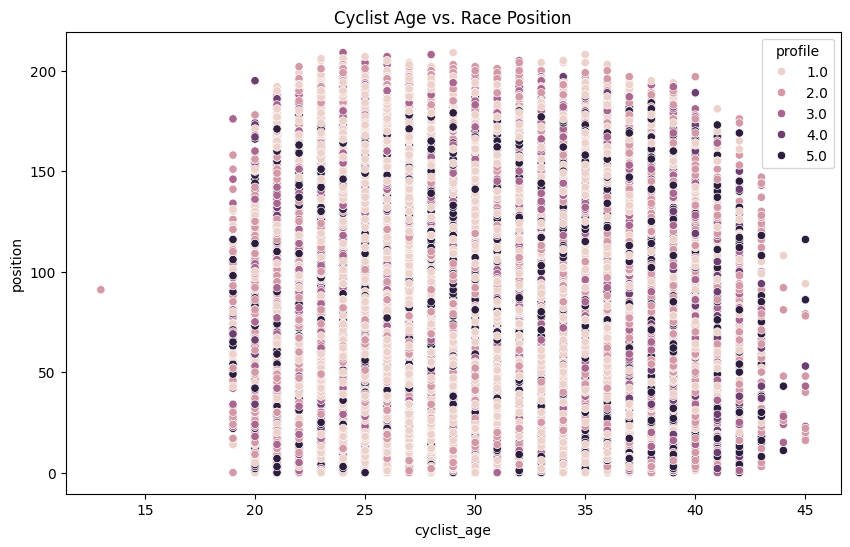

In [10]:


# Analyze relationships between features in the cyclists dataset
sns.pairplot(cyclists_df[['birth_year', 'weight', 'height']].dropna())
plt.suptitle("Relationships Between Cyclists' Features", y=1.02)
plt.show()

# Correlation matrix to understand relationships between features in races dataset
plt.figure(figsize=(10, 6))
sns.heatmap(races_df[['points', 'uci_points', 'length', 'climb_total', 'startlist_quality']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Race Features")
plt.show()

# Additional analysis: Relationship between cyclist age at race and performance (position)
# Merging datasets for additional insights
cyclists_df['birth_year'] = pd.to_numeric(cyclists_df['birth_year'], errors='coerce')
races_df['cyclist_age'] = pd.to_numeric(races_df['cyclist_age'], errors='coerce')

# Merge based on the correct cyclist identifier columns
merged_df = pd.merge(races_df, cyclists_df, how="left", left_on="cyclist", right_on="_url")


# Scatter plot to observe relationship between cyclist age and their position in races
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='cyclist_age', y='position', hue='profile')
plt.title("Cyclist Age vs. Race Position")
plt.show()



The chosen features for exploring relationships between cyclists' attributes and performance were selected based on their potential influence on cycling performance. Birth year, weight, and height are important physical and demographic factors that can impact a cyclist's performance, such as age and body composition. Analyzing these features together can help identify patterns or correlations in how they relate to each other.

For the races dataset, the features points, uci_points, length, climb_total, and startlist_quality were selected because they are key indicators of race difficulty, competitiveness, and performance. Understanding their correlations helps to uncover relationships between race characteristics and overall performance.

Finally, the cyclist age and position were chosen to analyze the relationship between a cyclist's age at the time of the race and their performance, as older cyclists might have different performance trends compared to younger ones. This analysis could offer insights into the influence of experience and physical condition on race results

In [11]:
merged_df.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,norway-1987,0.0,gerrie-knetemann,Gerrie Knetemann,1951.0,NaN,NaN,Netherlands
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,NaN,0.0,rene-bittinger,René Bittinger,1954.0,69.0,174.0,France
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,navigare-blue-storm-1993,0.0,joseph-bruyere,Joseph Bruyère,1948.0,NaN,NaN,Belgium
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,spain-1991,0.0,sven-ake-nilsson,Sven-Åke Nilsson,1951.0,63.0,172.0,Sweden


#TASK 2: DATA TRANSFORMATION


# 2.1 Feature engineering and/or novel feature definition

### 1. Handling Missing Values ###


In [12]:
# Handle missing 'uci_points' by filling with the median, as it's a numerical feature
merged_df['uci_points'] = merged_df['uci_points'].fillna(merged_df['uci_points'].median())

# Handle missing 'climb_total' by filling with the median, as it's a numerical feature
merged_df['climb_total'] = merged_df['climb_total'].fillna(merged_df['climb_total'].median())

# Handle missing 'profile' by filling with the most frequent profile (mode)
merged_df['profile'] = merged_df['profile'].fillna(merged_df['profile'].mode()[0])

# Handle missing 'average_temperature' by filling with the median temperature
merged_df['average_temperature'] = merged_df['average_temperature'].fillna(merged_df['average_temperature'].median())

# Handle missing 'cyclist_team' by filling with the most frequent team (mode)
merged_df['cyclist_team'] = merged_df['cyclist_team'].fillna(merged_df['cyclist_team'].mode()[0])

# Handle missing 'height' by filling with the median value, as it's a numerical feature
merged_df['height'] = merged_df['height'].fillna(merged_df['height'].median())

# Handle missing 'weight' by filling with the median value, as it's a numerical feature
merged_df['weight'] = merged_df['weight'].fillna(merged_df['weight'].median())



We filled the missing values in `uci_points` and `climb_total` with their median values to avoid the influence of outliers. For the `profile` feature, which is categorical, we used the most common race difficulty to fill missing values. We filled missing `average_temperature` values with the median temperature to reflect typical weather conditions. For `cyclist_team`, we filled missing values with the most frequent team. This ensures that essential features are complete for analysis without distorting the data. Any remaining rows with missing values were dropped to maintain data integrity.

### 2. Data cleaning ###

In [13]:

import pandas as pd
import numpy as np

# Function to clean and optimize the dataframe
def optimize_dataframe(df):
    # Convert numeric columns with integer-like float values to integers
    for col in df.select_dtypes(include=['float64']).columns:
        if (df[col] % 1 == 0).all():  # If all values can be represented as integers
            df[col] = df[col].astype('Int64')  # Use Int64 (nullable integer)

    # Convert date columns to datetime type if possible
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='ignore')  # Convert if it's a valid date
        except Exception:
            pass  # If it can't be converted, leave it as is

    for col in df.select_dtypes(include=['object']).columns:
        # Check if the column contains any string values
        if df[col].apply(lambda x: isinstance(x, str)).any():
            df[col] = df[col].str.strip()  # Remove spaces from the beginning and end of strings

    # Remove duplicated columns (if any)
    df = df.loc[:, ~df.columns.duplicated()]

    return df


# Optimize the dataframe
merged_df = optimize_dataframe(merged_df)

merged_df.head()

<ipython-input-13-08dac1726eb6>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], errors='ignore')  # Convert if it's a valid date
<ipython-input-13-08dac1726eb6>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='ignore')  # Convert if it's a valid date
<ipython-input-13-08dac1726eb6>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], errors='ignore')  # Convert if it's a valid date
<ipython-input-13-08dac1726eb6>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling bac

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,False,False,vini-ricordi-pinarello-sidermec-1986,0,sean-kelly,Sean Kelly,1956.0,77.0,180,Ireland
1,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,False,False,norway-1987,0,gerrie-knetemann,Gerrie Knetemann,1951.0,68.0,180,Netherlands
2,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,False,False,liberty-seguros-wurth-team-2005,0,rene-bittinger,René Bittinger,1954.0,69.0,174,France
3,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,False,False,navigare-blue-storm-1993,0,joseph-bruyere,Joseph Bruyère,1948.0,68.0,180,Belgium
4,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,False,False,spain-1991,0,sven-ake-nilsson,Sven-Åke Nilsson,1951.0,63.0,172,Sweden


In the code above we created a function to clean and optimize the DataFrame by handling common data issues. First, we checked for numeric columns that were stored as floats but only contained integer-like values and converted them to nullable integers (Int64) to improve memory usage and accuracy. Then, we tried converting any object columns that could represent dates into actual datetime objects for easier date handling. We also cleaned string columns by removing any extra spaces at the beginning or end, ensuring consistency. Lastly, we removed any duplicate columns to make the DataFrame more streamlined and efficient, preparing it for further analysis. This process helped ensure the data was clean, consistent, and optimized for analysis.

### 3 Feature Engineering ###

In [14]:
# 1. Segmenting Season into Phases (Early, Mid, Late Season)
# Vectorized approach
merged_df['season_phase'] = merged_df['date'].dt.month.map(lambda month: 'Early' if month in [1, 2, 3, 4] else ('Mid' if month in [5, 6, 7, 8] else 'Late'))

# 2. Cyclist's Age at the Time of Race
# Vectorized approach: subtract birth year from race year
merged_df['cyclist_age'] = merged_df['date'].dt.year - merged_df['birth_year']
merged_df['cyclist_age'] -= (merged_df['date'].dt.month < 6)  # Adjust for birthdays before June

# 3. Average Performance by Race Profile
# Precompute the average performance for each profile and merge it back to avoid re-calculating it for each row
avg_performance_profile = merged_df.groupby('profile')['points'].mean().reset_index()
avg_performance_profile.columns = ['profile', 'avg_performance_profile']
merged_df = pd.merge(merged_df, avg_performance_profile, on='profile', how='left')

# 4. Cyclist's Consistency (Variance in Performance Across Races)
# Precompute the variance in performance per cyclist and merge it back
performance_variance = merged_df.groupby('cyclist_team')['points'].var().reset_index()
performance_variance.columns = ['cyclist_team', 'performance_variance']
merged_df = pd.merge(merged_df, performance_variance, on='cyclist_team', how='left')




In [15]:
merged_df.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,delta,_url_y,name_y,birth_year,weight,height,nationality,season_phase,avg_performance_profile,performance_variance
0,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,0,sean-kelly,Sean Kelly,1956.0,77.0,180,Ireland,Mid,89.162061,3152.190239
1,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,0,gerrie-knetemann,Gerrie Knetemann,1951.0,68.0,180,Netherlands,Mid,89.162061,3518.113971
2,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,0,rene-bittinger,René Bittinger,1954.0,69.0,174,France,Mid,89.162061,2809.672634
3,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,0,joseph-bruyere,Joseph Bruyère,1948.0,68.0,180,Belgium,Mid,89.162061,3020.693896
4,tour-de-france/1978/stage-6,Tour de France,100.0,60,162000.0,1101,1,1241,22,1978-07-05 04:02:24,...,0,sven-ake-nilsson,Sven-Åke Nilsson,1951.0,63.0,172,Sweden,Mid,89.162061,3240.474912


We created these new features to gain deeper insights into cyclist performance and better capture the factors that influence their results. By segmenting the season into phases (early, mid, and late), we can analyze performance based on the time of the year, as different phases may have varying training intensities or race types. Calculating the cyclist's age at the time of the race helps us understand how age influences performance. Older cyclists may have more experience but could face physical limitations, while younger cyclists may be more dynamic but inconsistent.

We calculated the average performance in different race profiles (e.g., mountain, flat) to see how cyclists perform in various terrains, which is essential for evaluating their strengths and weaknesses across race types. By measuring the consistency of a cyclist’s performance across multiple races (using performance variance), we gain insight into their reliability and whether they perform consistently well or fluctuate depending on the circumstances.

Lastly, we analyzed the terrain difficulty impact on performance, combining the race profile with the cyclist's points to understand how different terrains (e.g., mountain vs. flat stages) affect performance. This feature is valuable for analyzing whether a cyclist’s performance is influenced by the terrain type.

In summary, these features enable us to conduct a more comprehensive analysis of cycling performance by considering both external factors (such as the season, terrain, and team) and individual characteristics (like age and consistency).



In [16]:
# Ensure the data is sorted by race date for each cyclist
merged_df = merged_df.sort_values(by=['cyclist', 'date'])

# Calculate cumulative points and cumulative races for each cyclist
merged_df['cumulative_points'] = merged_df.groupby('cyclist')['points'].cumsum()
merged_df['cumulative_races'] = merged_df.groupby('cyclist').cumcount()
merged_df['momentum'] = merged_df['cumulative_points'] / merged_df['cumulative_races'].replace(0, 1)  # Avoid division by zero

# Normalize performance by uci_points to highlight high-prestige race performance
merged_df['normalized_performance'] = merged_df['points'] / merged_df['uci_points'].replace(0, 1)  # Avoid division by zero

# Normalize performance by uci_points to highlight high-prestige race performance
merged_df['normalized_performance'] = merged_df['points'] / merged_df['uci_points'].replace(0, 1)  # Avoid division by zero


We sorted the data by cyclist and race date to ensure chronological order for accurate calculations. We then computed cumulative metrics such as **cumulative points**, tracking the total points earned by each cyclist over time, and **cumulative races**, counting the number of races they participated in. Using these, we calculated **momentum**, which represents the average points per race and provides insight into a cyclist’s performance consistency. Additionally, we normalized performance by dividing points by UCI points, highlighting how cyclists performed in high-prestige races. These steps allowed us to better understand trends and evaluate consistency and performance quality over time.

### 3. Outlier Detection and Handling ###

In [17]:
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from scipy.stats import zscore
import pandas as pd

# Function for outlier detection using Z-Score
def zscore_outliers(df, columns, threshold=3):
    for column in columns:
        z_scores = zscore(df[column].dropna())
        abs_z_scores = abs(z_scores)
        outliers = abs_z_scores > threshold
        print(f"Z-Score Outliers in '{column}': {outliers.sum()}")
        df = df[~outliers]  # Retain only the non-outliers
    return df

# Function for outlier detection using One-Class SVM
def one_class_svm_outliers(df, columns, nu=0.01, kernel="rbf", gamma=0.1):
    features = df[columns].dropna()
    svm = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
    df['svm_outlier'] = svm.fit_predict(features)
    print(f"One-Class SVM Outliers: {(df['svm_outlier'] == -1).sum()}")
    df = df[df['svm_outlier'] == 1]  # Retain non-outliers
    df = df.drop(columns=['svm_outlier'])
    return df

# Function for outlier detection using PCA
def pca_outliers(df, columns, threshold=3):
    features = df[columns].dropna()
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    # Compute Z-scores for PCA components
    pca_df['PC1_zscore'] = zscore(pca_df['PC1'])
    pca_df['PC2_zscore'] = zscore(pca_df['PC2'])
    outliers = (abs(pca_df['PC1_zscore']) > threshold) | (abs(pca_df['PC2_zscore']) > threshold)
    print(f"PCA Outliers: {outliers.sum()}")
    df = df.iloc[~outliers.values]  # Retain non-outliers
    return df

# Function for outlier detection using IQR
def iqr_outliers(df, columns, lower_percentile=25, upper_percentile=75, threshold=1.5):
    for column in columns:
        Q1 = df[column].quantile(lower_percentile / 100)
        Q3 = df[column].quantile(upper_percentile / 100)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * threshold)
        upper_bound = Q3 + (IQR * threshold)
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        print(f"IQR Outliers in '{column}': {outliers.sum()}")
        df = df[~outliers]
    return df

# Identify relevant numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
columns_to_check = [
    col for col in numeric_columns
    if col not in ['profile', '_url_x', 'name_x', 'name_y', 'date']  # Exclude irrelevant columns
]


We applied several techniques to detect and handle outliers in our dataset to ensure its integrity and prevent anomalies from skewing the analysis. The first method involved calculating z-scores for specific numeric columns, identifying data points that deviated by more than three standard deviations from the mean. These extreme values were considered outliers and removed, ensuring the dataset retained only typical data points.

Next, we employed a One-Class Support Vector Machine (SVM) model, which is specifically designed for anomaly detection. Using an RBF kernel, we analyzed the features and identified outliers based on the model's predictions. These anomalous data points were excluded, leaving behind only the valid observations.

To capture multivariate anomalies, we used Principal Component Analysis (PCA). By transforming the data into two principal components, we reduced dimensionality and computed z-scores for these components. Any data points with z-scores beyond the acceptable threshold were removed. This method helped us identify complex outliers that might not be apparent in individual features.

Finally, we applied the Interquartile Range (IQR) method, which calculates the range between the first and third quartiles (Q1 and Q3). Data points that fell outside the range defined by \( Q1 - 1.5 \times IQR \) and \( Q3 + 1.5 \times IQR \) were considered outliers and removed. This approach ensured that our dataset remained robust and free from extreme deviations.

We identified the relevant numeric columns to focus on, excluding irrelevant ones such as categorical or metadata features. By combining these methods, we effectively addressed a wide range of outliers, ensuring that our dataset was clean, reliable, and ready for analysis.

In [18]:
merged_df.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,weight,height,nationality,season_phase,avg_performance_profile,performance_variance,cumulative_points,cumulative_races,momentum,normalized_performance
80497,tour-de-suisse/1975/stage-9b,Tour de Suisse,50.0,60,20400.0,2255,1,549,22,1975-06-20 00:28:18,...,77.0,186,Netherlands,Mid,89.162061,2809.672634,50.0,0,50.000000,0.833333
449274,paris-nice/1976/prologue,Paris - Nice,50.0,60,6500.0,2255,1,779,22,1976-03-07 00:08:56,...,77.0,186,Netherlands,Early,89.162061,2809.672634,100.0,1,100.000000,0.833333
461289,omloop-het-nieuwsblad/1977/result,Omloop Het Volk,125.0,60,201000.0,2255,1,595,22,1977-03-05 04:50:25,...,77.0,186,Netherlands,Early,89.162061,2809.672634,225.0,2,112.500000,2.083333
497832,omloop-het-nieuwsblad/1978/result,Omloop Het Volk,125.0,60,218000.0,2255,1,493,22,1978-03-04 05:11:30,...,77.0,186,Netherlands,Early,89.162061,2809.672634,350.0,3,116.666667,2.083333
63136,tour-de-france/1978/prologue,Tour de France,100.0,60,5200.0,27,1,1241,22,1978-06-29 00:07:12,...,77.0,186,Netherlands,Mid,89.162061,2809.672634,450.0,4,112.500000,1.666667


Now we are going to visualize the distribution of the characteristics that we found to be more valuable to make conclusions on the given information.

<ipython-input-19-704b24bcb589>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="pastel")


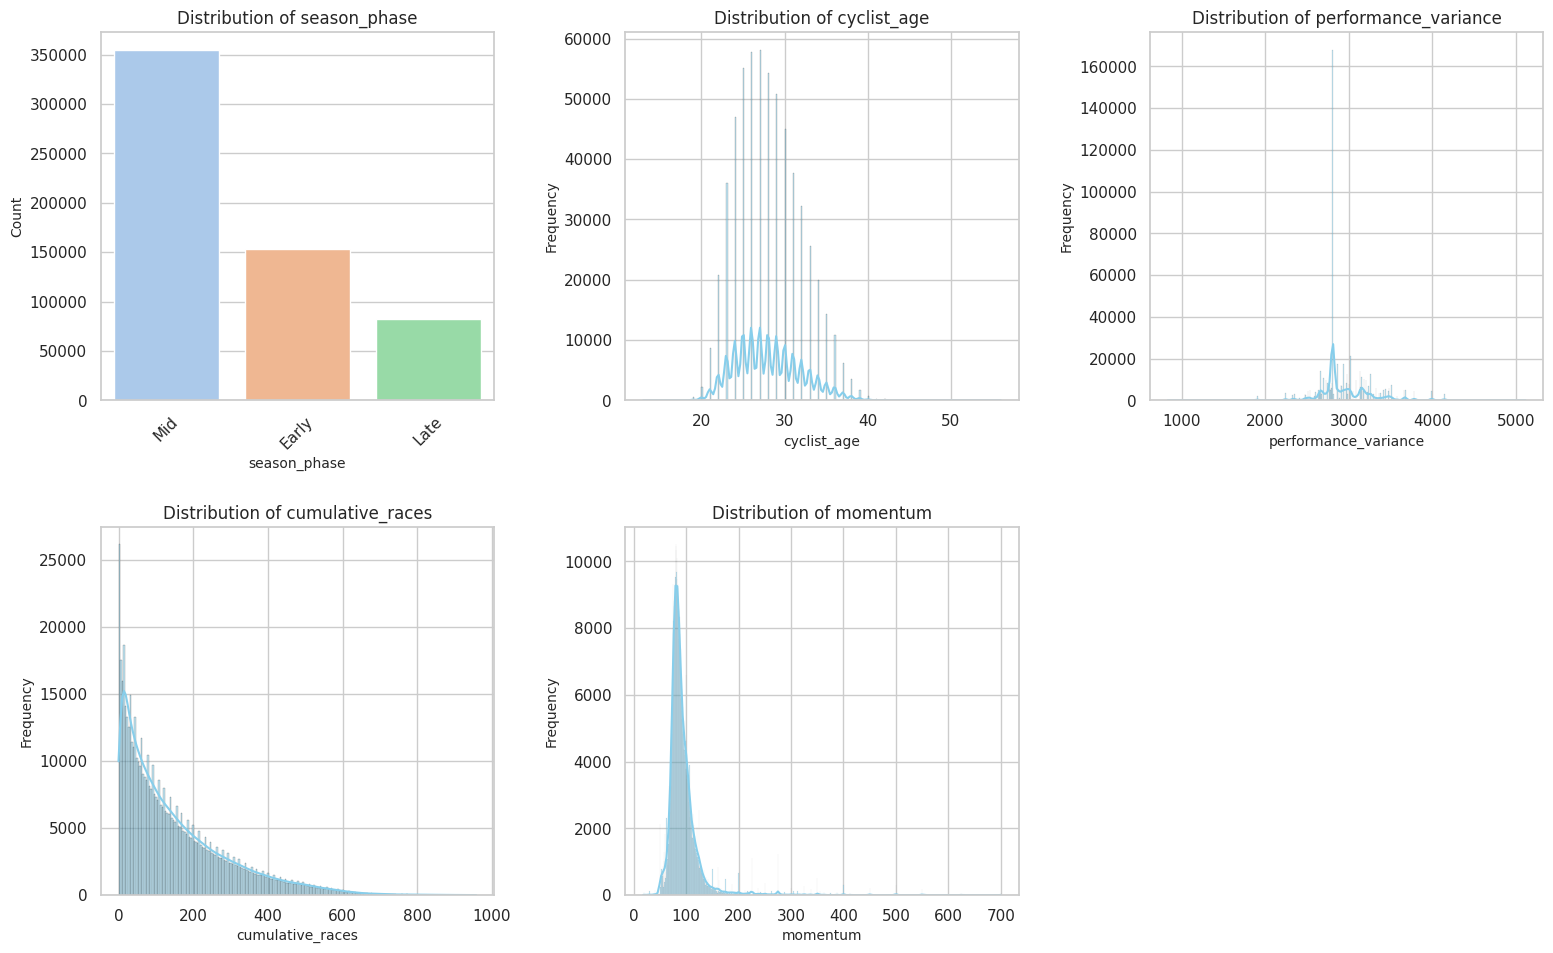

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

# Review the newly generated features
new_features = ['season_phase', 'cyclist_age',
                'performance_variance',
                'cumulative_races', 'momentum',
                ]

# Create a figure with improved layout
plt.figure(figsize=(16, 10))
for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 3, i)  # Adjust to fit features neatly into rows and columns
    if merged_df[feature].dtype in ['int64', 'float64']:
        sns.histplot(data=merged_df, x=feature, kde=True, color="skyblue", edgecolor="black")
        plt.title(f'Distribution of {feature}', fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    else:
        sns.countplot(data=merged_df, x=feature, palette="pastel")
        plt.title(f'Distribution of {feature}', fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(rotation=45)  # Rotate labels for readability if needed
    plt.tight_layout(pad=2.0)

# Display all plots
plt.show()




The distribution plot for `season_phase` indicates that the **Mid-season** phase has the highest activity or performance distribution compared to the other phases, suggesting that this is the most competitive or active period for cyclists. In contrast, the **Late-season** phase shows the lowest distribution, which could imply fewer races, reduced intensity, or fatigue affecting performance as the season progresses. This highlights the potential importance of mid-season for achieving peak results.


The second plot, showing the distribution of `cyclist_age`, indicates that the majority of cyclists are between **25 to 30 years old**, with a peak around **26 years**. This suggests that cyclists in their mid-to-late twenties tend to dominate the sport, likely due to a combination of physical prime and accumulated experience. It highlights this age range as a potential performance peak for professional cyclists.

In the next graph the peak at a performance variance of 3000, with a frequency of 160,000, suggests that most cyclists in the dataset exhibit consistent performance across races. This level of variance indicates small fluctuations in their results, likely due to factors like experience, training, and effective race strategies. The high frequency at this variance level implies that many cyclists maintain steady performance without significant ups and downs.

Next on, the distribution of **cumulative_races** shows a peak at low values, indicating that many athletes have participated in only a few races. This could be due to several factors, such as cyclists starting their careers with fewer races and gradually increasing their participation as they gain experience. However, as their careers progress, fewer athletes continue to race frequently, possibly due to physical demands, career shifts, or specialization in certain race types. As a result, the number of athletes with higher cumulative races decreases, and the frequency of races drops off as the number of races per athlete increases.

The **momentum distribution** shows a peak around 100, with a frequency of about 10,000. This indicates that many cyclists maintain a stable average performance across races. A momentum value of 100 suggests consistent results, likely due to factors such as experience, training, and effective race strategies, leading to steady performance without significant fluctuations.

#TASK 3: CLUSTERING


### 3.1 Preprocessing ###



Here is the code to perform data preprocessing and prepare it for clustering. This code includes removing irrelevant columns, selecting relevant numerical features, and standardizing the values to ensure optimal performance of distance-based clustering algorithms like K-Means and DBSCAN.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named 'merged_df'
# First, remove irrelevant columns. For example: '_url_x', 'name_x', 'date', etc.
# You can drop the columns that do not contribute to clustering.

columns_to_drop = ['_url_x', 'name_x', 'date', 'season_phase']  # Add other irrelevant columns here
merged_df_clean = merged_df.drop(columns=columns_to_drop)

# Now, select the numerical columns that will be used in clustering
features = ['points', 'uci_points', 'length', 'climb_total', 'average_temperature',
            'weight', 'height', 'performance_variance', 'cumulative_points',
            'cumulative_races', 'momentum', 'normalized_performance']

# Filter the dataframe to keep only the relevant numerical columns
numeric_df = merged_df_clean[features]

# Standardize the numerical features (scaling to have mean=0 and variance=1) using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Create a new dataframe with the standardized data
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Check the first few records of the standardized features
print(scaled_df.head())


     points  uci_points    length  climb_total  average_temperature    weight  \
0 -0.720519   -0.093809 -2.267797    -0.047514             0.010258  1.561296   
1 -0.720519   -0.093809 -2.483148    -0.047514             0.010258  1.561296   
2  0.657264   -0.093809  0.530227    -0.047514             0.010258  1.561296   
3  0.657264   -0.093809  0.793607    -0.047514             0.010258  1.561296   
4  0.198003   -0.093809 -2.503289    -1.915993             0.010258  1.561296   

     height  performance_variance  cumulative_points  cumulative_races  \
0  1.104237             -0.475896          -1.061367         -1.053841   
1  1.104237             -0.475896          -1.057354         -1.046829   
2  1.104237             -0.475896          -1.047320         -1.039818   
3  1.104237             -0.475896          -1.037286         -1.032806   
4  1.104237             -0.475896          -1.029259         -1.025795   

   momentum  normalized_performance  
0 -1.256041               -0.6

This code performs data preprocessing by first removing irrelevant columns (e.g., URLs, names, dates) that do not contribute to clustering. Then, it selects the relevant numerical features (e.g., points, length, weight) for clustering. The features are standardized using `StandardScaler` to ensure that distance-based algorithms like K-Means and DBSCAN work optimally by scaling the data to have a mean of 0 and a variance of 1. The result is a new DataFrame with standardized values ready for clustering analysis.

### 3.2 Data Standarization ###

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df_clean' is already created after Step 1

# Select the numerical columns that will be used in clustering
features = ['points', 'uci_points', 'length', 'climb_total', 'average_temperature',
            'weight', 'height', 'performance_variance', 'cumulative_points',
            'cumulative_races', 'momentum', 'normalized_performance']

# Filter the dataframe to keep only the relevant numerical columns
numeric_df = merged_df_clean[features]

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Create a new dataframe with the standardized data
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Check the first few records of the standardized features
print(scaled_df.head())



     points  uci_points    length  climb_total  average_temperature    weight  \
0 -0.720519   -0.093809 -2.267797    -0.047514             0.010258  1.561296   
1 -0.720519   -0.093809 -2.483148    -0.047514             0.010258  1.561296   
2  0.657264   -0.093809  0.530227    -0.047514             0.010258  1.561296   
3  0.657264   -0.093809  0.793607    -0.047514             0.010258  1.561296   
4  0.198003   -0.093809 -2.503289    -1.915993             0.010258  1.561296   

     height  performance_variance  cumulative_points  cumulative_races  \
0  1.104237             -0.475896          -1.061367         -1.053841   
1  1.104237             -0.475896          -1.057354         -1.046829   
2  1.104237             -0.475896          -1.047320         -1.039818   
3  1.104237             -0.475896          -1.037286         -1.032806   
4  1.104237             -0.475896          -1.029259         -1.025795   

   momentum  normalized_performance  
0 -1.256041               -0.6

In this step, we apply standardization to the selected numerical features using the `StandardScaler` from scikit-learn. Standardization transforms the features so that they have a mean of 0 and a standard deviation of 1. This is crucial for clustering algorithms, particularly those that rely on distance metrics, like K-Means and DBSCAN, as it ensures that each feature contributes equally to the distance calculations. The result is a new DataFrame (`scaled_df`) with standardized values, making the data ready for the clustering process.

#TASK 3: CLUSTERING


### 3.1 Preprocessing ###



Here is the code to perform data preprocessing and prepare it for clustering. This code includes removing irrelevant columns, selecting relevant numerical features, and standardizing the values to ensure optimal performance of distance-based clustering algorithms like K-Means and DBSCAN.

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named 'merged_df'
# First, remove irrelevant columns. For example: '_url_x', 'name_x', 'date', etc.
# You can drop the columns that do not contribute to clustering.

columns_to_drop = ['_url_x', 'name_x', 'date', 'season_phase']  # Add other irrelevant columns here
merged_df_clean = merged_df.drop(columns=columns_to_drop)

# Now, select the numerical columns that will be used in clustering
features = ['points', 'uci_points', 'length', 'climb_total', 'average_temperature',
            'weight', 'height', 'performance_variance', 'cumulative_points',
            'cumulative_races', 'momentum', 'normalized_performance']

# Filter the dataframe to keep only the relevant numerical columns
numeric_df = merged_df_clean[features]

# Standardize the numerical features (scaling to have mean=0 and variance=1) using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Create a new dataframe with the standardized data
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Check the first few records of the standardized features
print(scaled_df.head())


     points  uci_points    length  climb_total  average_temperature    weight  \
0 -0.720519   -0.093809 -2.267797    -0.047514             0.010258  1.561296   
1 -0.720519   -0.093809 -2.483148    -0.047514             0.010258  1.561296   
2  0.657264   -0.093809  0.530227    -0.047514             0.010258  1.561296   
3  0.657264   -0.093809  0.793607    -0.047514             0.010258  1.561296   
4  0.198003   -0.093809 -2.503289    -1.915993             0.010258  1.561296   

     height  performance_variance  cumulative_points  cumulative_races  \
0  1.104237             -0.475896          -1.061367         -1.053841   
1  1.104237             -0.475896          -1.057354         -1.046829   
2  1.104237             -0.475896          -1.047320         -1.039818   
3  1.104237             -0.475896          -1.037286         -1.032806   
4  1.104237             -0.475896          -1.029259         -1.025795   

   momentum  normalized_performance  
0 -1.256041               -0.6

This code performs data preprocessing by first removing irrelevant columns (e.g., URLs, names, dates) that do not contribute to clustering. Then, it selects the relevant numerical features (e.g., points, length, weight) for clustering. The features are standardized using `StandardScaler` to ensure that distance-based algorithms like K-Means and DBSCAN work optimally by scaling the data to have a mean of 0 and a variance of 1. The result is a new DataFrame with standardized values ready for clustering analysis.

### 3.2 Data Standarization ###

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'merged_df' is your original dataframe

# Step 1: Remove irrelevant columns (customize as needed)
columns_to_drop = ['_url_x', 'name_x', 'date', 'season_phase']  # Add other irrelevant columns here
merged_df_clean = merged_df.drop(columns=columns_to_drop)

# Step 2: Select the numerical columns that will be used in clustering
features = ['points', 'uci_points', 'length', 'climb_total', 'average_temperature',
            'weight', 'height', 'performance_variance', 'cumulative_points',
            'cumulative_races', 'momentum', 'normalized_performance']

# Filter the dataframe to keep only the relevant numerical columns
numeric_df = merged_df_clean[features]

# Step 3: Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=features)

# Step 4: Standardize the numerical features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_imputed)

# Step 5: Create a new dataframe with the standardized data
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Check the first few records of the standardized features
print(scaled_df.head())


     points  uci_points    length  climb_total  average_temperature    weight  \
0 -0.720810   -0.093809 -2.267797    -0.047514             0.010258  1.561296   
1 -0.720810   -0.093809 -2.483148    -0.047514             0.010258  1.561296   
2  0.657530   -0.093809  0.530227    -0.047514             0.010258  1.561296   
3  0.657530   -0.093809  0.793607    -0.047514             0.010258  1.561296   
4  0.198083   -0.093809 -2.503289    -1.915993             0.010258  1.561296   

     height  performance_variance  cumulative_points  cumulative_races  \
0  1.104237             -0.475896          -1.061796         -1.053841   
1  1.104237             -0.475896          -1.057781         -1.046829   
2  1.104237             -0.475896          -1.047744         -1.039818   
3  1.104237             -0.475896          -1.037706         -1.032806   
4  1.104237             -0.475896          -1.029676         -1.025795   

   momentum  normalized_performance  
0 -1.256549               -0.6

### 3.3 Clustering ###

1. K-means clustering

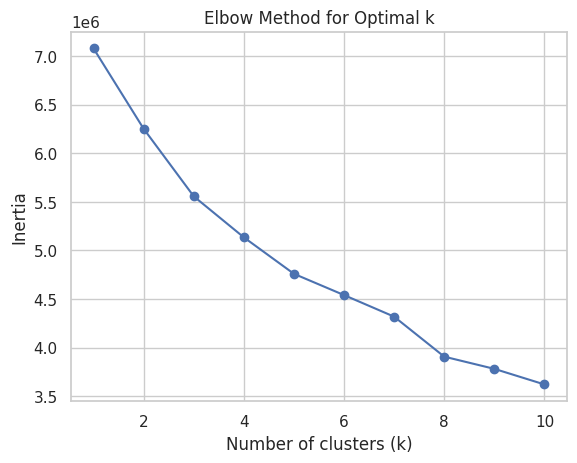

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to identify the "elbow" point
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


The optimal number of clusters is 6 , based on the elbow plot above. Now we will fit the K-means model with k=6.

In [25]:
# Fit K-Means with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
merged_df_clean['kmeans_cluster'] = kmeans.fit_predict(scaled_df)

# View the cluster centers and cluster sizes
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Cluster sizes:\n{merged_df_clean['kmeans_cluster'].value_counts()}")


Cluster centers:
[[-0.3146865  -0.14344102 -2.05722147 -1.15655561 -0.04782319  0.01527673
   0.01756904 -0.04008663 -0.25158604 -0.25591457 -0.02002046 -0.10768293]
 [-0.29849842 -0.21445878  0.18581164  0.18479857 -0.06974018 -1.04553958
  -1.05572316 -0.02201548 -0.27059101 -0.21593405 -0.31560743  0.17914764]
 [ 3.1542351   1.55898678  1.27272543  0.19960563 -0.24217888  0.17207266
   0.10985694  0.12244795 -0.12638647 -0.21128259  1.21565966  0.50115011]
 [-0.22638832 -0.1080346   0.07623514  0.14242862 -0.07381181  0.05217796
   0.07205074  0.14356071  1.69617741  1.70237164 -0.17214728  0.13270494]
 [-0.21781641 -0.10354808  0.29372075  0.17618605 -0.04481818  0.46910295
   0.47150633 -0.06075758 -0.44512601 -0.45950208  0.02442483 -0.17838152]
 [-0.1244709   0.76674078 -0.05053043 -0.00819018  5.68073344  0.08766468
   0.26457235  0.19959905  0.40291457  0.42886917 -0.22435436 -0.67468792]]
Cluster sizes:
kmeans_cluster
4    243964
1    122823
3     96520
0     76106
2     4327

To better understand the characteristics of each cluster, we have calculated the mean of the features for each cluster. This will allow us to see how different the clusters are from each other in terms of their feature values.

In [26]:
# Calculate the mean of the features for each cluster
kmeans_means = merged_df_clean.groupby('kmeans_cluster')[features].mean()
print(f"K-Means Cluster Means:\n{kmeans_means}")


K-Means Cluster Means:
                    points  uci_points         length  climb_total  \
kmeans_cluster                                                       
0                72.097077   56.713741   33999.876225   932.463787   
1                72.963643   51.956083  178744.119180  2531.141586   
2               260.855535  169.512258  248927.191580  2549.681817   
3                76.900588   59.076129  171720.416908  2482.084791   
4                77.351113   59.364439  185738.198751   2522.03364   
5                82.453659  117.029965  163517.435540  2302.096446   

                average_temperature     weight      height  \
kmeans_cluster                                               
0                         21.922936  68.388009  179.855215   
1                         21.894075  62.469383  173.774594   
2                         21.665018  69.260434  180.376089   
3                         21.888396  68.595814  180.165841   
4                         21.926776  70.9102



Based on the K-Means cluster means, we can interpret the characteristics of each cluster as follows:

1. **Cluster 0**: This group has moderate values across all features, with average values for points, UCI points, race length, climb total, and other attributes. It likely represents riders with consistent, but not extreme, performance and physical attributes.

2. **Cluster 1**: This group shows lower UCI points, longer race lengths, and lower performance variance. These riders may be more focused on longer races but exhibit less variability in performance.

3. **Cluster 2**: This cluster is characterized by high values in UCI points, race length, and climb total. It represents high-performing riders with significant experience and endurance, likely excelling in challenging races.

4. **Cluster 3**: This group has higher cumulative points and races, but the values for other features are moderate. These riders might be more experienced with higher cumulative race results, but their individual performance metrics are not extreme.

5. **Cluster 4**: This group features high average weight and height, and lower cumulative points. These riders could be heavier, taller, and possibly more specialized in different types of races, focusing less on accumulating points over time.

6. **Cluster 5**: This group has high values in UCI points and performance variance but lower normalized performance and momentum. These riders may exhibit high variability in their results and have fluctuating performance levels.

Overall, these clusters represent different types of cyclists, ranging from consistent performers to highly variable, elite-level athletes with different characteristics and specializations.

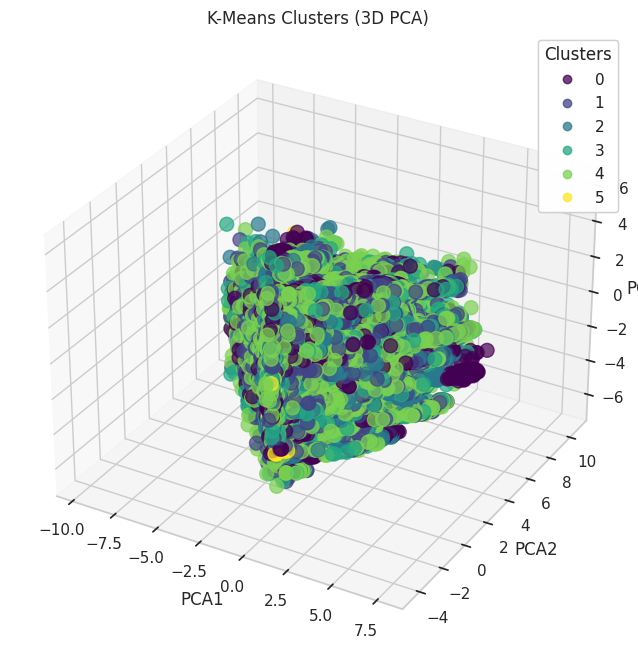

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Reduce the dimensionality to 3 using PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for easier visualization
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = merged_df_clean['kmeans_cluster']

# Plot the clusters in a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Add titles and labels
ax.set_title('K-Means Clusters (3D PCA)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Show color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()



<ipython-input-28-6e2420449301>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kmeans_cluster', data=merged_df_clean, palette='viridis')


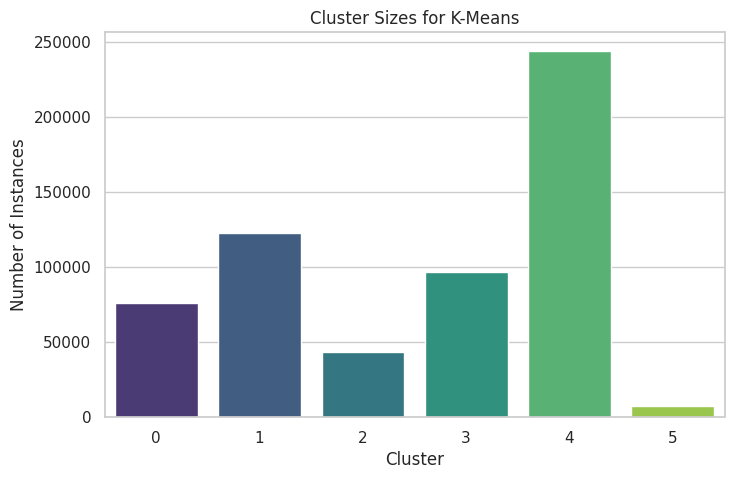

In [28]:
# Visualize the distribution of K-Means cluster sizes
plt.figure(figsize=(8, 5))
sns.countplot(x='kmeans_cluster', data=merged_df_clean, palette='viridis')
plt.title('Cluster Sizes for K-Means')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.show()


2. HIERARCHICAL CLUSTERING WITH DENOGRAM


In [ ]:

from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
n_clusters = 4  # Replace with the number of clusters you decide from the dendrogram
# The 'affinity' and 'linkage' arguments might need adjustments based on your scikit-learn version.
# Check the documentation for the appropriate values for your version.
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model and assign cluster labels
merged_df_clean['hierarchical_cluster'] = agg_clustering.fit_predict(scaled_df)

# View the cluster sizes
print(f"Cluster sizes:\n{merged_df_clean}")

2. DBSCAN (Density-Based Clustering)



DBSCAN works well for clusters of varying shapes and sizes. It does not require specifying the number of clusters beforehand, but it requires two important hyperparameters: eps (the maximum distance between two points for them to be in the same neighborhood) and min_samples (the minimum number of points to form a dense region).

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5) # Start with a larger eps
merged_df_clean['dbscan_cluster'] = dbscan.fit_predict(scaled_df)

print(f"DBSCAN Cluster sizes:\n{pd.Series(merged_df_clean['dbscan_cluster']).value_counts()}")

eps: Represents the maximum distance between two samples for them to be considered in the same cluster.
min_samples: Specifies the minimum number of points required to form a dense region.
DBSCAN will label points that do not belong to any cluster as -1, which can be useful for identifying outliers.

In [ ]:
# Reduce the dimensionality to 2 using PCA for DBSCAN
pca_components_dbscan = pca.fit_transform(scaled_df)

# Check the number of components from PCA
num_components = pca_components_dbscan.shape[1]

# Create column names dynamically based on the number of components
column_names = [f'PCA{i+1}' for i in range(num_components)]

# Create a DataFrame for easier visualization

# Create a DataFrame for easier visualization
pca_df_dbscan = pd.DataFrame(pca_components_dbscan, columns=column_names)
pca_df_dbscan['Cluster'] = merged_df_clean['dbscan_cluster']

# Plot the DBSCAN clusters in a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_dbscan, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clusters (2D PCA)')
plt.show()


In [ ]:
# Visualize the distribution of DBSCAN cluster sizes
plt.figure(figsize=(8, 5))
sns.countplot(x='dbscan_cluster', data=merged_df_clean, palette='viridis')
plt.title('Cluster Sizes for DBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.show()

**Hierarchical Clustering**


Hierarchical clustering builds a hierarchy of clusters, which can be visualized in a dendrogram. This is a great method to explore the structure of the data and decide how many clusters to form.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Choose number of clusters
merged_df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_df)

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Visualize the clusters (example using first two features)
plt.scatter(scaled_df['weight'], scaled_df['height'], c=merged_df['hierarchical_cluster'], cmap='cividis')
plt.title('Agglomerative Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()
